In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1)

In [12]:
X = mnist['data']
y = mnist['target'].astype(np.int)
X_train = X[:60000]
X_val = X[60000:]
y_train = y[:60000]
y_val = y[60000:]

In [46]:
X_train_subset = X_train[:20000]
y_train_subset = y_train[:20000]

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]


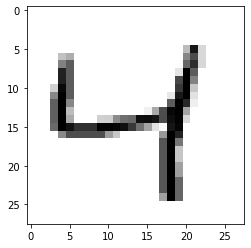

In [47]:
print(y_train_subset[:30])
first_digit = X_train_subset[2]
first_digit_img = first_digit.reshape(28, 28)
plt.imshow(first_digit_img, cmap='binary')

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [48]:
def get_stochastic_learning_rate(t, t0, t1):
    return (t0 / (t + t1))

def stochastic_gds_digit_classifier(X, y, epochs, t0, t1, target_digit):
    # first, bias X
    m = len(y)
    y = (y == target_digit).astype(np.int)
    max_val = np.amax(X) # find max for scaling
    X = X / max_val # scaled
    bias = np.ones((m, 1))
    X = np.append(bias, X, axis=1) # stack along 1st (starts at 0) dimension: columns
    theta = np.ones((len(X[0]), 1))
    for epoch in range(epochs): # stochastic gradient descent, uses only a single instance at any given point
        for i in range(m):
            random_idx = np.random.randint(m) # random number between 0 and m - 1
            xi = X[random_idx]
            yi = y[random_idx]
            exponent = -1 * np.dot(xi,theta)
            logit = 1 / (1 + np.exp(exponent))
            gradient = np.multiply((logit - yi), xi.reshape(-1, 1))
            theta = theta - 2 *  np.multiply(get_stochastic_learning_rate(epoch * m + i, t0, t1), gradient)
    return theta                

In [80]:
def predict(x, theta):
    max_val = np.amax(x)
    x = x / max_val
    x_fixed = x[:,None] / max_val
    x_fixed = np.append([1], x)
    exponent = -1 * np.dot(x_fixed, theta)
    return 1 / (1 + np.exp(exponent))[0]


In [54]:
thetas = []
y_col = y_train_subset.T
for training_target in range(10):
    print("Training for {}".format(training_target))
    theta_for_target_digit = stochastic_gds_digit_classifier(X_train_subset, y_col, 80, 99, 100, training_target)
    thetas.append(theta_for_target_digit)

Training for 0
Training for 1
Training for 2
Training for 3
Training for 4
Training for 5
Training for 6
Training for 7
Training for 8
Training for 9


Actual value is: 7, predicted is: [7]
Actual value is: 2, predicted is: [2]
Actual value is: 1, predicted is: [1]
Actual value is: 0, predicted is: [0]
Actual value is: 4, predicted is: [4]
Actual value is: 1, predicted is: [1]
Actual value is: 4, predicted is: [4]
Actual value is: 9, predicted is: [9]
WRONG: Actual value is: 5, predicted is: [4]
Actual value is: 9, predicted is: [9]
Actual value is: 0, predicted is: [0]
Actual value is: 6, predicted is: [6]
Actual value is: 9, predicted is: [9]
Actual value is: 0, predicted is: [0]
Actual value is: 1, predicted is: [1]
Actual value is: 5, predicted is: [5]
Actual value is: 9, predicted is: [9]
Actual value is: 7, predicted is: [7]
Actual value is: 3, predicted is: [3]
Actual value is: 4, predicted is: [4]
Actual value is: 9, predicted is: [9]
Actual value is: 6, predicted is: [6]
Actual value is: 6, predicted is: [6]
Actual value is: 5, predicted is: [5]
Actual value is: 4, predicted is: [4]
Actual value is: 0, predicted is: [0]
Actua

WRONG: Actual value is: 9, predicted is: [8]
Actual value is: 4, predicted is: [4]
Actual value is: 6, predicted is: [6]
WRONG: Actual value is: 2, predicted is: [7]
WRONG: Actual value is: 2, predicted is: [1]
Actual value is: 5, predicted is: [5]
Actual value is: 0, predicted is: [0]
WRONG: Actual value is: 6, predicted is: [8]
Actual value is: 5, predicted is: [5]
Actual value is: 6, predicted is: [6]
Actual value is: 3, predicted is: [3]
Actual value is: 7, predicted is: [7]
Actual value is: 2, predicted is: [2]
Actual value is: 0, predicted is: [0]
Actual value is: 8, predicted is: [8]
Actual value is: 8, predicted is: [8]
Actual value is: 5, predicted is: [5]
Actual value is: 4, predicted is: [4]
Actual value is: 1, predicted is: [1]
Actual value is: 1, predicted is: [1]
Actual value is: 4, predicted is: [4]
WRONG: Actual value is: 0, predicted is: [5]
Actual value is: 3, predicted is: [3]
Actual value is: 3, predicted is: [3]
Actual value is: 7, predicted is: [7]
Actual value is

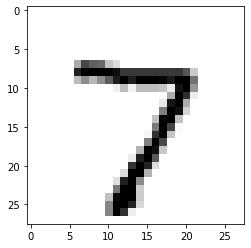

In [86]:
y_val_subset = y_val[:500]
X_val_subset = X_val[:500]
plt.imshow(X_val_subset[0].reshape(28, 28), cmap='binary')
num_mistakes = 0
for i in range(len(y_val_subset)):
    predictions = []
    for pred in range(len(thetas)):
        predictions.append(predict(X_val_subset[i], thetas[pred]))
    max_preds = np.where(predictions == np.amax(predictions))[0]
    if (len(max_preds) > 1 or max_preds[0] != y_val_subset[i]):
        print('WRONG: Actual value is: {}, predicted is: {}'.format(y_val_subset[i], max_preds))
        num_mistakes = num_mistakes + 1
    else:
        print('Actual value is: {}, predicted is: {}'.format(y_val_subset[i], max_preds))
print("Total validation size: {}, number of incorrect predictions: {}, error ratio: {}".format(len(y_val_subset), num_mistakes, num_mistakes/len(y_val_subset)))